In [1]:
res = !echo sample_data/unzipped/*
res = res[0]
filenames = res.split(' ')

In [2]:
len(filenames)

296

vectorized tweets shape: (13180, 3842)


Text(0, 0.5, 'cumulative explained variance')

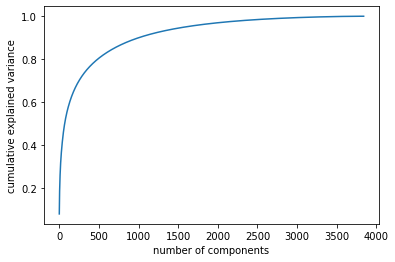

In [3]:
import json
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import PCA
from sklearn.cluster import MiniBatchKMeans, DBSCAN
from sklearn.neighbors import NearestNeighbors
from nltk.stem import PorterStemmer
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import re


# load some sample data
data = []
for filename in filenames[:10]:
    with open(filename, 'r') as f:
        data = data + json.loads('['+f.read().replace('}{','},{')+']')

# remove retweets
tweets = [tweet for tweet in data if 'retweeted_status' not in tweet]
# keep english language tweets only
tweets = [tweet for tweet in tweets if tweet['lang'] == 'en']


# seperate out just tweet text for simplicity
ttexts = [tweet['full_text'] for tweet in tweets]
# (probably unecessary) keep an id map: tweet text index --> tweet id
# id_map = {i: tweets[i]['id'] for i in range(len(tweets))}

# remove numbers
ttexts = [re.sub('[0-9]+', '', tweet) for tweet in ttexts]



# make stemmer to pass to vectorizer
stemmer = PorterStemmer()
analyzer = CountVectorizer().build_analyzer()

def stemmed_words(doc):
    return (stemmer.stem(w) for w in analyzer(doc))

# remove stop words, tokenize, stem
vectorizer = CountVectorizer(strip_accents='ascii', stop_words='english', analyzer=stemmed_words, min_df=5)
vtweets = vectorizer.fit_transform(ttexts)
print('vectorized tweets shape:', vtweets.shape)


vdf = pd.DataFrame(vtweets.toarray(), columns=sorted(vectorizer.vocabulary_.keys()))


# draw pca graph
pca = PCA()
pca.fit(vdf)

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

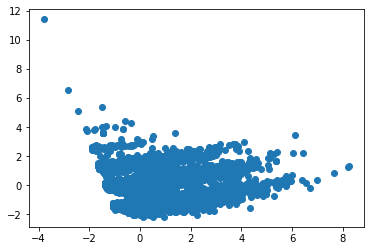

In [4]:
# plotting the first 2 components can reveal some obvious clusters
pca = PCA(2)
pctweets = pca.fit_transform(vdf)
plt.scatter(pctweets[:,0], pctweets[:,1])

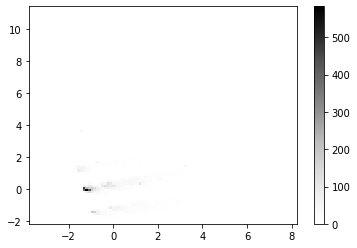

In [6]:
# plotting the first 2 components as density hist?
plt.hist2d(pctweets[:,0], pctweets[:,1], bins=(100, 100), cmap=plt.cm.Greys)
plt.colorbar()
